BIKE PREDICTION BY USING MACHINE LEARNING MODEL LINER REGRESSION

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files


In [ ]:
#We could use direct link from umlwebsite but We have downloaded the data and uploaded it.
uploaded = files.upload()
dt = pd.read_csv('hour.csv')  # a data frame which has all the features of the dataset in simple words it has the raw data


Data Understanding and Cleaning

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
dt.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


We would want our data to be clean and precise so major step is to remove the null values but in our case null value has not been present . Same with the duplicate values because it could provide redunddnacy

DATA PREPROCESSING - Data koi aisa he kya jo humko categorical value mei convert karna he kyuki hum linear regression use kar re toh humko sab kuhc integer ya float mei hi chiye correlation find karne ke liye between the parameters

yaha humko date ka parameter takleef dera he kyuki vo object type ka he baki sb normal he;

In [ ]:
dt = dt.drop('dteday', axis=1) #date object wala feature usme se sirf day nikal ke hata diya baki ka

## ***EDA***

In [ ]:
correlation_matrix = dt.corr()
print(correlation_matrix)


             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

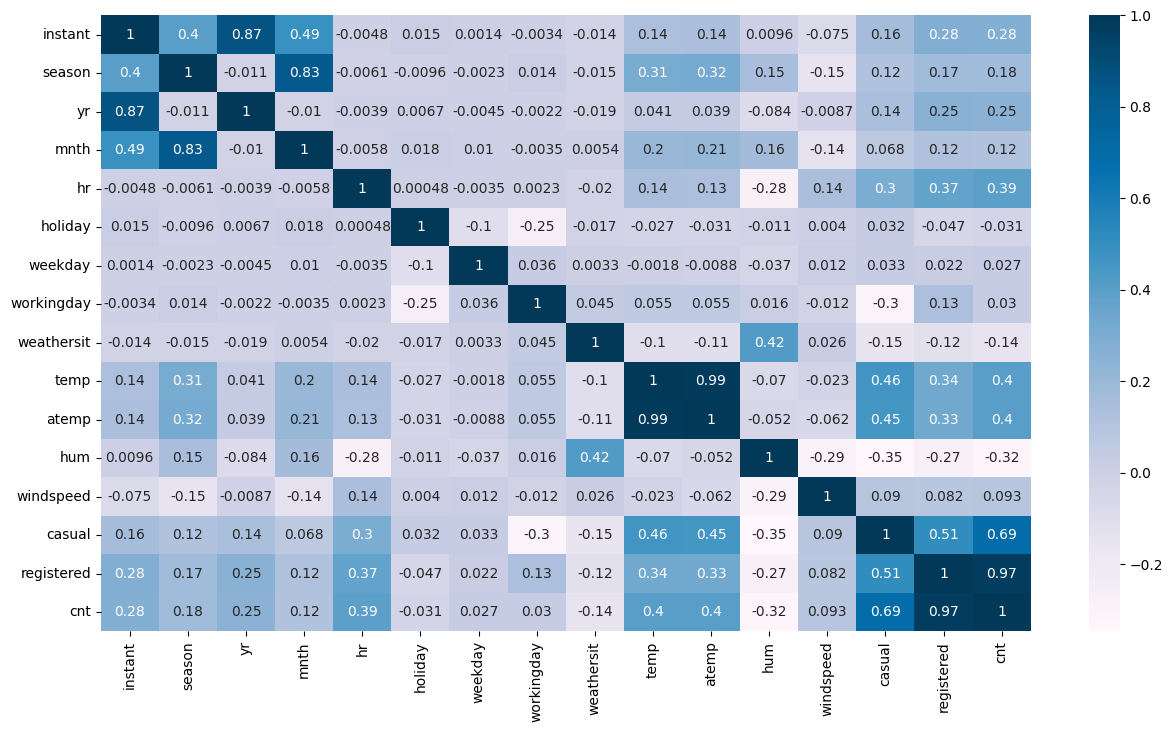

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))  # Adjust the width and height as needed
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu')
plt.show()

In [ ]:

# Strong Positive Correlation:
#  - cnt  and temp (temperature):   indicates that as the temperature increases, the number of rented bikes also to increase.
#  - cnt and atemp (feeling temperature): Similar to temp,

#  - temp and atemp: A very strong positive correlation
#  - casual and registered: A moderate positive correlation exist linearly dependent on each other


# Possible Insights:
#  - Weather condition has a significant role: Temperature suggest of bike rental demand.
#  - Humidity and windspeed are less influential: These weather factors have a less pronounced effect on bike rental numbers.convert this mse to accuracy

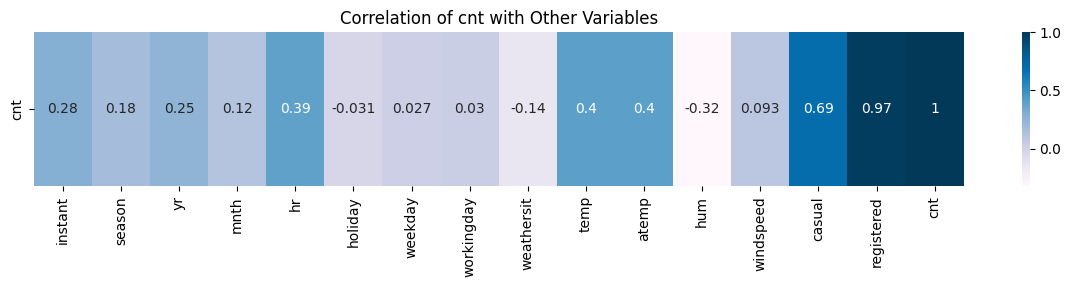

In [ ]:
correlation_matrix = dt.corr()


cnt_correlations = correlation_matrix['cnt']


cnt_correlations_2d = cnt_correlations.values.reshape(1, -1)

# Create heatmap
plt.figure(figsize=(15, 2))  # Adjust figsize for a horizontal layout
sns.heatmap(cnt_correlations_2d, annot=True, cmap='PuBu',
            xticklabels=cnt_correlations.index, yticklabels=['cnt'])
plt.title('Correlation of cnt with Other Variables')
plt.show()

In [ ]:
#registered higly corelated

In [ ]:


# Based on the correlation and the graphs

# Features to Keep:

#temp because good +ve corelation with cnt;
#atemp poitive corelation but atemp and temp almost same redundnat;
#hr - relatable it is
#weekday - little influence;
#working day - intituion maay give some info because holidays less people go so needed
#weather sit - graph says ki antar toh he;

#season - may be covered by the month so we take month;
#mnth - season corelated anyone le lo
#yr ka not much difference both have almost same values;
#hum #windspeeed just additional feature nothing significant feels

#caasual and registerd users are corelated but linearly dependent on each other






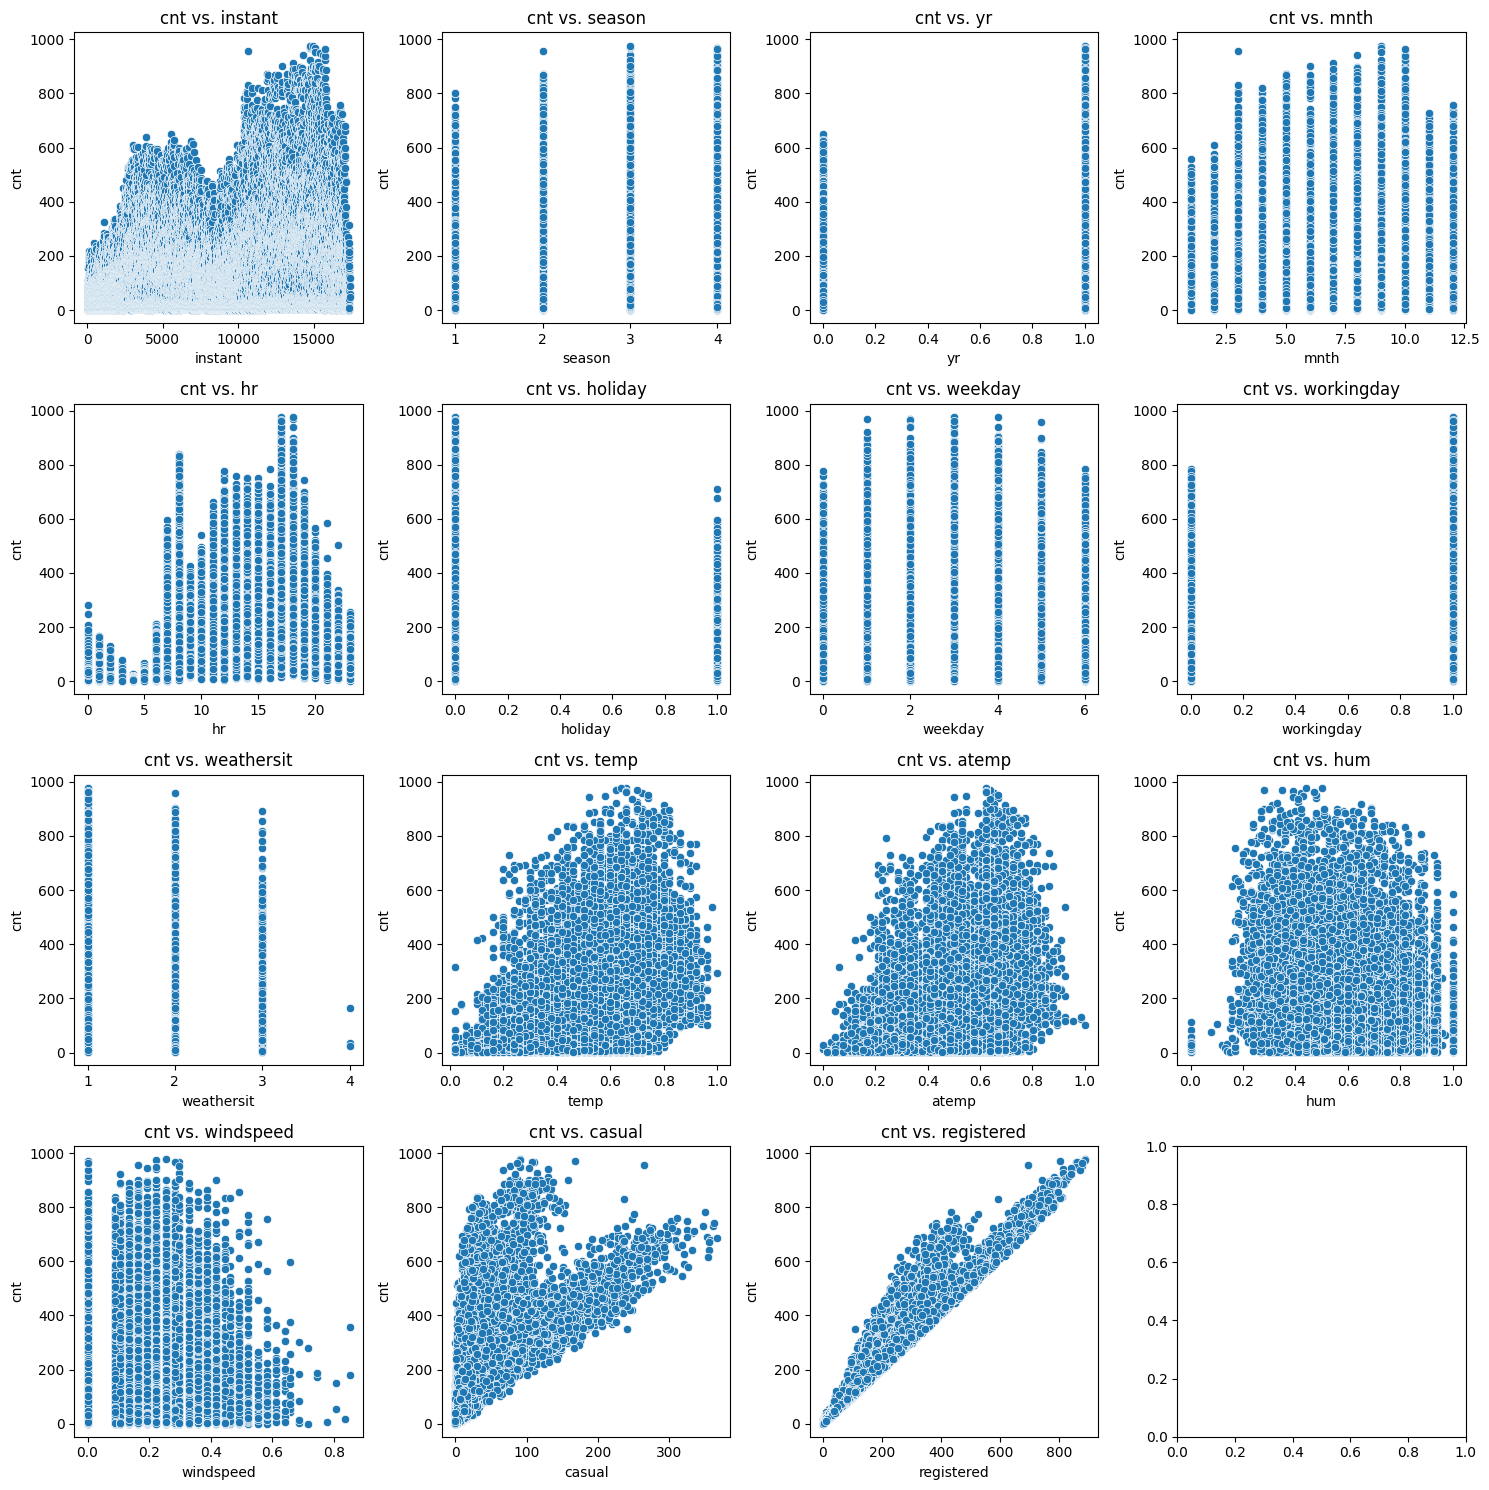

In [ ]:

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

axes = axes.flatten()


for i, column in enumerate(dt.columns[:-1]):
    sns.scatterplot(x=column, y='cnt', data=dt, ax=axes[i])
    axes[i].set_title(f'cnt vs. {column}')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

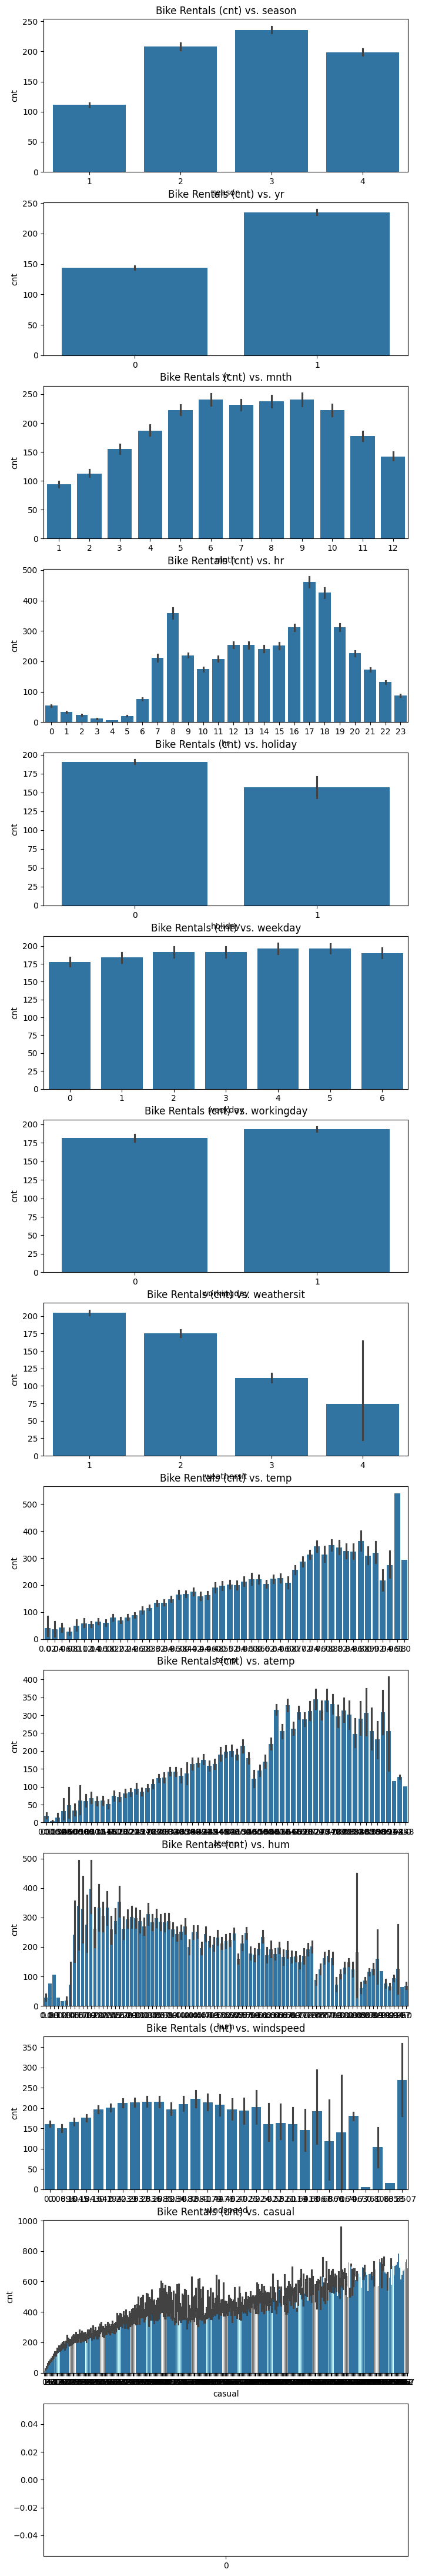

In [ ]:



features_to_plot = [col for col in dt.columns if col not in ['instant', 'cnt']]


fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(8, 4 * len(features_to_plot)))

for i, feature in enumerate(features_to_plot):
  sns.barplot(x=feature, y='cnt', data=dt, ax=axes[i])
  axes[i].set_title(f'Bike Rentals (cnt) vs. {feature}')


plt.tight_layout()
plt.show()


In [ ]:
print("Mean median mode statistics for colums")
for column in dt.columns:
    print(f"\nColumn: {column}")
    print(f"Mean: {dt[column].mean()}")
    print(f"Median: {dt[column].median()}")
    print(f"Mode: {dt[column].mode()[0]}")

Mean median mode statistics for colums

Column: instant
Mean: 8690.0
Median: 8690.0
Mode: 1

Column: season
Mean: 2.5016399102364923
Median: 3.0
Mode: 3

Column: yr
Mean: 0.5025605615973301
Median: 1.0
Mode: 1

Column: mnth
Mean: 6.537775476149376
Median: 7.0
Mode: 5

Column: hr
Mean: 11.546751826917545
Median: 12.0
Mode: 16

Column: holiday
Mean: 0.028770355026181024
Median: 0.0
Mode: 0

Column: weekday
Mean: 3.003682605443351
Median: 3.0
Mode: 6

Column: workingday
Mean: 0.6827205247712756
Median: 1.0
Mode: 1

Column: weathersit
Mean: 1.425283387997008
Median: 1.0
Mode: 1

Column: temp
Mean: 0.4969871684216583
Median: 0.5
Mode: 0.62

Column: atemp
Mean: 0.4757751021347604
Median: 0.4848
Mode: 0.6212

Column: hum
Mean: 0.6272288394038783
Median: 0.63
Mode: 0.88

Column: windspeed
Mean: 0.1900976063064618
Median: 0.194
Mode: 0.0

Column: casual
Mean: 35.67621842453536
Median: 17.0
Mode: 0

Column: registered
Mean: 153.78686920996606
Median: 115.0
Mode: 4

Column: cnt
Mean: 189.46308763

***MODEL BUILDING***

In [ ]:
def manual_scaler(X):
    mean = np.mean(X, axis=0)  # Calculate mean of each feature
    std = np.std(X, axis=0)  # Calculate standard deviation of each feature
    X_scaled = (X - mean) / std
    return X_scaled, mean, std

In [ ]:
# Normalize the features (X)

X = dt[['mnth', 'hr','holiday', 'weekday', 'weathersit', 'temp']].values
y = dt['cnt'].values.reshape(-1, 1)

X_scaled, X_mean, X_std = manual_scaler(X)  # Manually scaled X

In [ ]:


 #min and max values for each feature after normalization
for i in range(X_scaled.shape[1]):
  print(f"Feature {i+1}: Min = {X_scaled[:, i].min()}, Max = {X_scaled[:, i].max()}")


Feature 1: Min = -1.6104379197073317, Max = 1.5884669822838249
Feature 2: Min = -1.670003982455765, Max = 1.6564805711432653
Feature 3: Min = -0.17211219589095386, Max = 5.81016350888682
Feature 4: Min = -1.4975629536636674, Max = 1.4938908389902141
Feature 5: Min = -0.6651928506235502, Max = 4.027157258016692
Feature 6: Min = -2.4772045106033276, Max = 2.612367245434355


In [ ]:

# : Initialize parameters
def parameter_initialisation(n_features):
    W = np.zeros((n_features, 1))  # initial 0
    b = 0  # 0
    return W, b

In [ ]:
#   predictions
def computation(W, b, X):
    return np.dot(X, W) + b

In [ ]:
#we eould try to now implemet the linewar regression model from basic making all step functions

In [ ]:

#  (Mean Squared Error)
def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [ ]:
# (Gradient Descent)
def update_params(W, b, learn_rate, dw, db):
    W -= learn_rate * dw
    b -= learn_rate * db
    return W, b


In [ ]:
#  funcition Train the model
def train(X, y, learn_rate, iterations):
    W, b = parameter_initialisation(X.shape[1])

    for iterations in range(iterations):
        y_pred = computation(W, b, X)
        lossvalue = loss_function(y, y_pred)  # Compute loss

        # Gradients calculation
        dw = 2 * np.dot(X.T, (y_pred - y)) / X.shape[0]
        db = 2 * np.sum(y_pred - y) / X.shape[0]

        # Update
        W, b = update_params(W, b, learn_rate, dw, db)

        # Print loss every 1000 iteratio
        if iterations % 1000 == 0:
            print(f"iterations {iterations}, Loss: {lossvalue}")

    return W, b

In [ ]:
# Predict function
def predict(X, W, b):
    return computation(W, b, X)

# Set hyperparameters and run training
learn_rate = 0.001  # Reduced learning rate for stability
iterations = 10000

In [ ]:

W, b = train(X, y, learn_rate, iterations)

 # predictions
y_pred = predict(X, W, b)

 #final weights and bias
print(f"Final Weights: {W.flatten()}, Bias: {b}")

iterations 0, Loss: 68795.82950687612
iterations 1000, Loss: 26437.698019860734
iterations 2000, Loss: 25878.41707822399
iterations 3000, Loss: 25449.109837351618
iterations 4000, Loss: 25108.306638255075
iterations 5000, Loss: 24833.839737525323
iterations 6000, Loss: 24610.028864870314
iterations 7000, Loss: 24425.337642572573
iterations 8000, Loss: 24271.19880967804
iterations 9000, Loss: 24141.20486231746
Final Weights: [  4.24358119   9.47102915 -12.96462735   1.84374983 -35.79237245
 162.17545769], Bias: 18.41087173880003


here we can add ridge regression

In [ ]:

X_sample = np.array([
    [1,1,0,1,1,0.14]

])

y_pred_sample = predict(X_sample, W, b)


print("Predicted bike rentals for the given data is :", y_pred_sample.flatten())

y_pred = predict(X, W, b)


print("Predicted bike rentals:", y_pred.flatten())


Predicted bike rentals for the given data is : [20.88142354]
Predicted bike rentals: [ 36.84668931  43.07420931  52.54523846 ... 276.44245454 285.91348369
 295.38451284]


In [ ]:
mse =np.mean((y - y_pred) ** 2)

In [ ]:


def mse_to_accuracy(mse, y_test):

  rmse = np.sqrt(mse)
  max_y = np.max(y_test)
  accuracy = 1 - (rmse / max_y)
  return accuracy

# Calculate the accuracy-like score
accuracy = mse_to_accuracy(mse, y)

# Output the accuracy-like score
print(f"Accuracy-like score: {100* accuracy}")


Accuracy-like score: 84.13328296741646
